In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [4]:
train='/content/drive/My Drive/Obclass/train/'

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=30,
    subset='training',
    seed=500 )

Found 1486 files belonging to 2 classes.
Using 1189 files for training.


In [6]:
val='/content/drive/My Drive/Obclass/train/'

In [7]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=30,
    subset='validation',
    seed=500
    )

Found 1486 files belonging to 2 classes.
Using 297 files for validation.


In [8]:
test='/content/drive/My Drive/Obclass/test/'

In [9]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=30,
    seed=500
    )

Found 382 files belonging to 2 classes.


In [10]:
print(val_data)
print(train_data)
print(test_data)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [11]:
class_names = ['ELectric Bus', 'Electric Car']

In [12]:
train_data.class_names = class_names
val_data.class_names = class_names

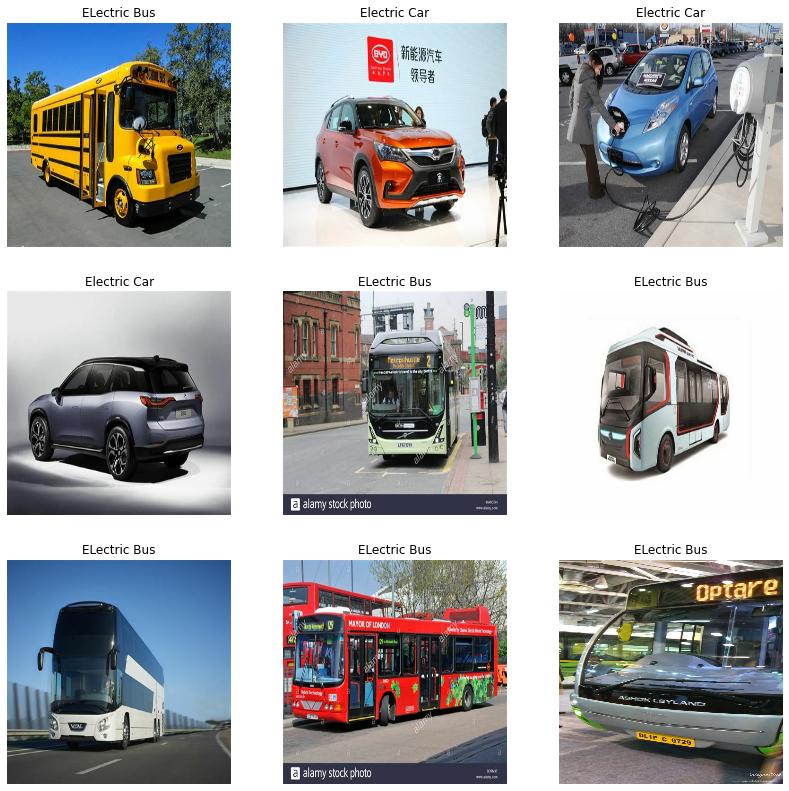

In [13]:
plt.figure(figsize=(14, 14))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()

In [16]:
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(133,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
40/40 [==============================] - 142s 3s/step - loss: 1.2471 - accuracy: 0.5887 - val_loss: 0.8348 - val_accuracy: 0.6532
Epoch 2/10
40/40 [==============================] - 64s 2s/step - loss: 0.6936 - accuracy: 0.6897 - val_loss: 0.7084 - val_accuracy: 0.6835
Epoch 3/10
40/40 [==============================] - 65s 2s/step - loss: 0.5232 - accuracy: 0.7536 - val_loss: 0.5859 - val_accuracy: 0.7273
Epoch 4/10
40/40 [==============================] - 59s 1s/step - loss: 0.4765 - accuracy: 0.7881 - val_loss: 0.5844 - val_accuracy: 0.7138
Epoch 5/10
40/40 [==============================] - 59s 1s/step - loss: 0.3692 - accuracy: 0.8478 - val_loss: 0.5741 - val_accuracy: 0.7576
Epoch 6/10
40/40 [==============================] - 65s 2s/step - loss: 0.3026 - accuracy: 0.8823 - val_loss: 0.5177 - val_accuracy: 0.7912
Epoch 7/10
40/40 [==============================] - 58s 1s/step - loss: 0.2405 - accuracy: 0.9151 - val_loss: 0.5167 - val_accuracy: 0.7946
Epoch 8/10
40/40 [=

In [20]:
model.evaluate(val_data)

10/10 [==============================] - 6s 542ms/step - loss: 0.5683 - accuracy: 0.8182


[0.5683397650718689, 0.8181818127632141]

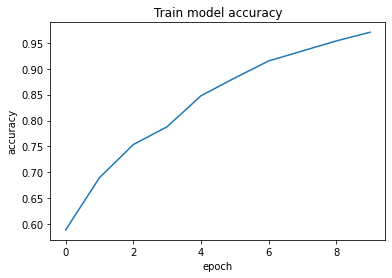

In [21]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

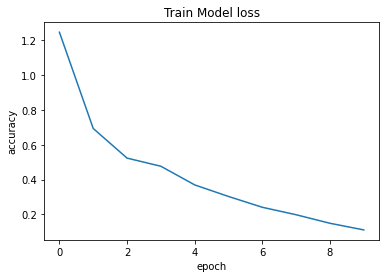

In [22]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

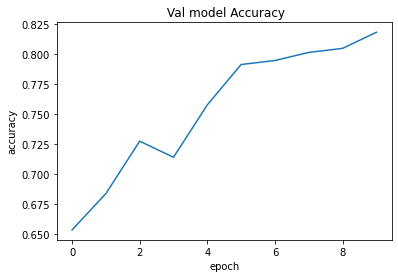

In [23]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

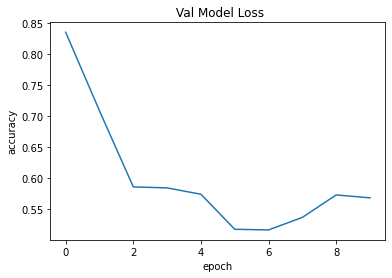

In [24]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

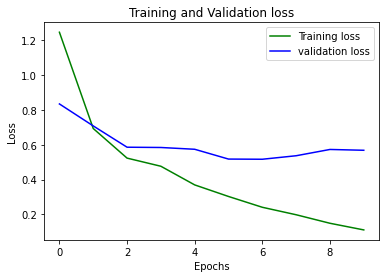

In [25]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

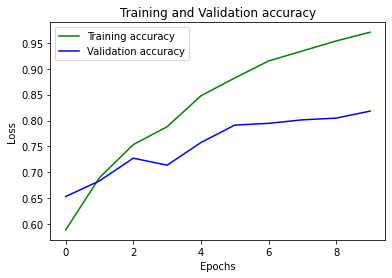

In [26]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
class_names={0:"Electric Bus", 1:"Electric Car"}

In [28]:
for images, labels in val_data.take(1):
    for i in range(6):
        print("True_class:",val_data.class_names[labels[i]])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        if p==0:
            print("Predicted Image: Electric Bus")
        else:
            print("Predicted Image: Electric Car")
        
        print("Predicted class:",p)
        print(" ")
print("All the predicted images are correct!!!!!")

True_class: Electric Car
1/1 [==============================] - 0s 266ms/step
Predicted Image: Electric Bus
Predicted class: 0
 
True_class: Electric Car
1/1 [==============================] - 0s 65ms/step
Predicted Image: Electric Bus
Predicted class: 0
 
True_class: Electric Car
1/1 [==============================] - 0s 67ms/step
Predicted Image: Electric Car
Predicted class: 1
 
True_class: Electric Car
1/1 [==============================] - 0s 58ms/step
Predicted Image: Electric Car
Predicted class: 1
 
True_class: Electric Car
1/1 [==============================] - 0s 56ms/step
Predicted Image: Electric Car
Predicted class: 1
 
True_class: ELectric Bus
1/1 [==============================] - 0s 51ms/step
Predicted Image: Electric Car
Predicted class: 1
 
All the predicted images are correct!!!!!


In [29]:
pred = model.predict(test_data)
pred = np.argmax(pred, axis=1)

13/13 [==============================] - 41s 1s/step


In [30]:
print(pred)

[0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 1 0]
